In [57]:
import numpy as np
import matplotlib.pyplot as plt

from typing import *

In [2]:
from sklearn import linear_model

## 1. Dataset generation

In [3]:
def add_gaussian_noise(y_data, stdev):
    return y_data + np.random.normal(size=len(y_data), scale=stdev)

def generate_noisy_data(x_data, f, stdev):
    return add_gaussian_noise(f(x_data), stdev)

In [4]:
x_data = np.sort(np.random.rand(100))

In [5]:
def my_sin(x):
    return np.sin(10*x)

y_sin_small_noise = generate_noisy_data(x_data, my_sin, 0.1)
y_sin_large_noise = generate_noisy_data(x_data, my_sin, 0.5)

In [6]:
def my_polynomial(x):
    return 10*x**10 - 7*x**2 + 6*x + 1

y_poly_small_noise = generate_noisy_data(x_data, my_polynomial, 0.1)
y_poly_large_noise = generate_noisy_data(x_data, my_polynomial, 0.5)

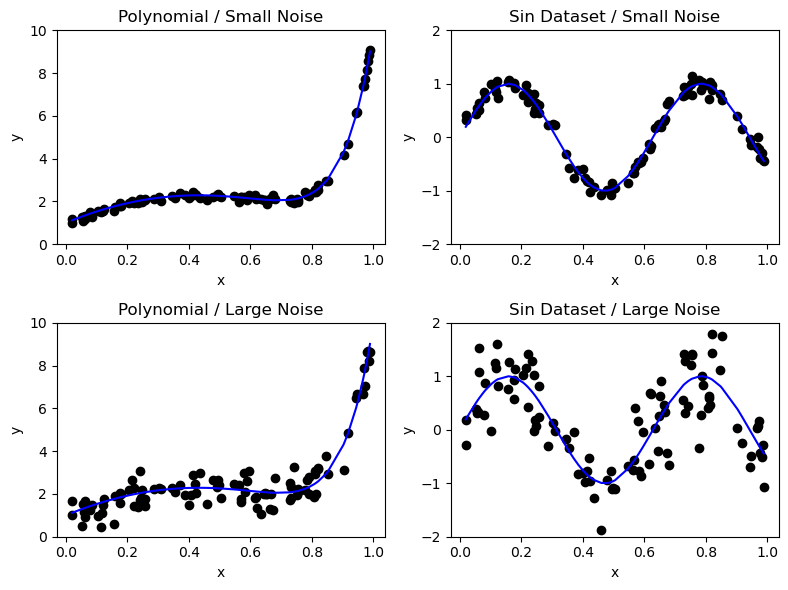

In [7]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(221)
ax1.scatter(x_data, y_poly_small_noise, c='k')
ax1.plot(x_data, my_polynomial(x_data), c='b')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Polynomial / Small Noise')
ax1.set_ylim([0, 10])

ax2 = fig.add_subplot(222)
ax2.scatter(x_data, y_sin_small_noise, c='k')
ax2.plot(x_data, my_sin(x_data), c='b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Sin Dataset / Small Noise')
ax2.set_ylim([-2, 2])

ax3 = fig.add_subplot(223)
ax3.scatter(x_data, y_poly_large_noise, c='k')
ax3.plot(x_data, my_polynomial(x_data), c='b')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Polynomial / Large Noise')
ax3.set_ylim([0, 10])

ax4 = fig.add_subplot(224)
ax4.scatter(x_data, y_sin_large_noise, c='k')
ax4.plot(x_data, my_sin(x_data), c='b')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title('Sin Dataset / Large Noise')
ax4.set_ylim([-2, 2])


fig.tight_layout()

## 2. Polynomial Linear Fitting

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [41]:
x = np.array([1, 2, 3])
poly_feature = PolynomialFeatures(
    10, # Order of the polynomial
    include_bias=True # Whether include x^0 term or not
)
poly_feature.fit_transform(x[:, np.newaxis])

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02, 7.2900e+02, 2.1870e+03, 6.5610e+03, 1.9683e+04,
        5.9049e+04]])

In [42]:
poly_model = make_pipeline(
    StandardScaler(),
    poly_feature,
    LinearRegression()
)

In [43]:
poly_model.fit(x_data[:, np.newaxis], y_poly_small_noise)
y_fit_poly_small_noise = poly_model.predict(x_data[:, np.newaxis])

poly_model.fit(x_data[:, np.newaxis], y_poly_large_noise)
y_fit_poly_large_noise = poly_model.predict(x_data[:, np.newaxis])

poly_model.fit(x_data[:, np.newaxis], y_sin_small_noise)
y_fit_sin_small_noise = poly_model.predict(x_data[:, np.newaxis])

poly_model.fit(x_data[:, np.newaxis], y_sin_large_noise)
y_fit_sin_large_noise = poly_model.predict(x_data[:, np.newaxis])

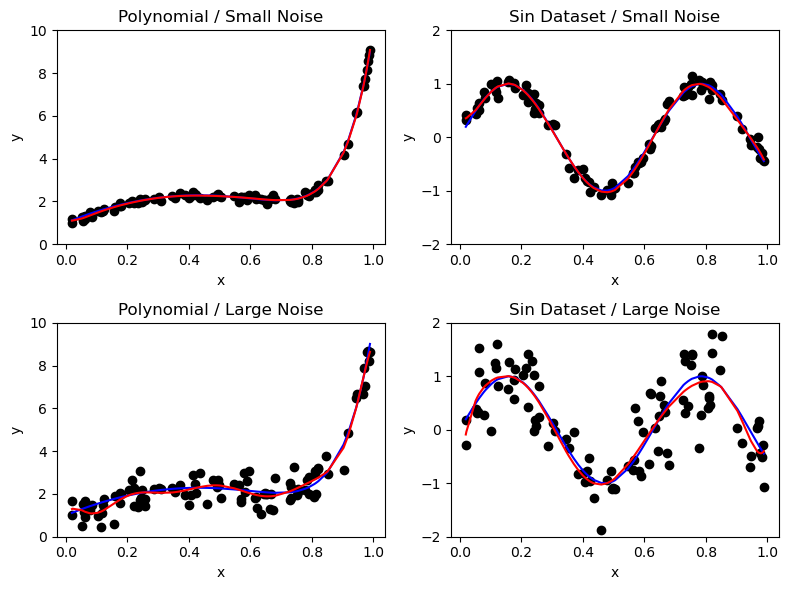

In [44]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(221)
ax1.scatter(x_data, y_poly_small_noise, c='k')
ax1.plot(x_data, my_polynomial(x_data), c='b')
ax1.plot(x_data, y_fit_poly_small_noise, c='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Polynomial / Small Noise')
ax1.set_ylim([0, 10])

ax2 = fig.add_subplot(222)
ax2.scatter(x_data, y_sin_small_noise, c='k')
ax2.plot(x_data, my_sin(x_data), c='b')
ax2.plot(x_data, y_fit_sin_small_noise, c='r')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Sin Dataset / Small Noise')
ax2.set_ylim([-2, 2])

ax3 = fig.add_subplot(223)
ax3.scatter(x_data, y_poly_large_noise, c='k')
ax3.plot(x_data, my_polynomial(x_data), c='b')
ax3.plot(x_data, y_fit_poly_large_noise, c='r')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Polynomial / Large Noise')
ax3.set_ylim([0, 10])

ax4 = fig.add_subplot(224)
ax4.scatter(x_data, y_sin_large_noise, c='k')
ax4.plot(x_data, my_sin(x_data), c='b')
ax4.plot(x_data, y_fit_sin_large_noise, c='r')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title('Sin Dataset / Large Noise')
ax4.set_ylim([-2, 2])


fig.tight_layout()

## Practice 1. How can we do Lasso and Ridge with sklearn package?

## Practice 2. How can we use Gaussian basis and Sigmoid basis?

Supplement material for Practice 2:

To use Gaussian and Sigmoid basis, you have to implement your own class like "PolynomialFeatures". To implement this, let's look how this class is implemented first. You can find code in https://github.com/scikit-learn/scikit-learn/blob/364c77e047ca08a95862becf40a04fe9d4cd2c98/sklearn/preprocessing/_polynomial.py 

Core methods are fit(self, X, y=None) in line 234 and transform(self, X) in line 310. This is for using pipeline. In sklearn.pipeline.Pipeline's [document](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline), you can see below.

> Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.


1. In fit method, you have to implement calculation of some constants related to your basis function. For example, in GaussianFeatures, you have to calcualate the location and standard deviation of your gaussian functions inside fit method. 

2. In transform method, you have to calculate $\Phi$ matrix in lecture slide as you saw in above example with PloynomialFeature.


Below is skeleton code for GaussianFeatures. You have to implement between "### Fill below ###" and "#######".

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N: int, stdev_scaling: Optional[float]=1.):
        self.N = N
    @staticmethod
    def _gaussian(x, x0, stdev):
        exponent = (x - x0)**2/(2 * stdev**2)
        return np.exp(-np.sum(exponent, axis=1))
        
    def fit(self, X, y=None):
        """Implement center positions and widths"""
        ### Fill below ###
        self._centers = np.linspace(X.min(), X.max(), self.N)
        self._stdevs = 3 * (self._centers[1] - self._centers[0])
        ######
        return self
        
    def transform(self, X):
        ### Fill below ###
        ## Return Phi matrix
        return self._gaussian(X[:, :, np.newaxis], self._centers, self._stdevs)
        ######
        
    

In [67]:
gaussian_model = make_pipeline(StandardScaler(), GaussianFeatures(30, 100), LinearRegression())

In [68]:
gaussian_model.fit(x_data[:, np.newaxis], y_poly_small_noise)
y_fit_poly_small_noise = gaussian_model.predict(x_data[:, np.newaxis])

gaussian_model.fit(x_data[:, np.newaxis], y_poly_large_noise)
y_fit_poly_large_noise = gaussian_model.predict(x_data[:, np.newaxis])

gaussian_model.fit(x_data[:, np.newaxis], y_sin_small_noise)
y_fit_sin_small_noise = gaussian_model.predict(x_data[:, np.newaxis])

gaussian_model.fit(x_data[:, np.newaxis], y_sin_large_noise)
y_fit_sin_large_noise = gaussian_model.predict(x_data[:, np.newaxis])

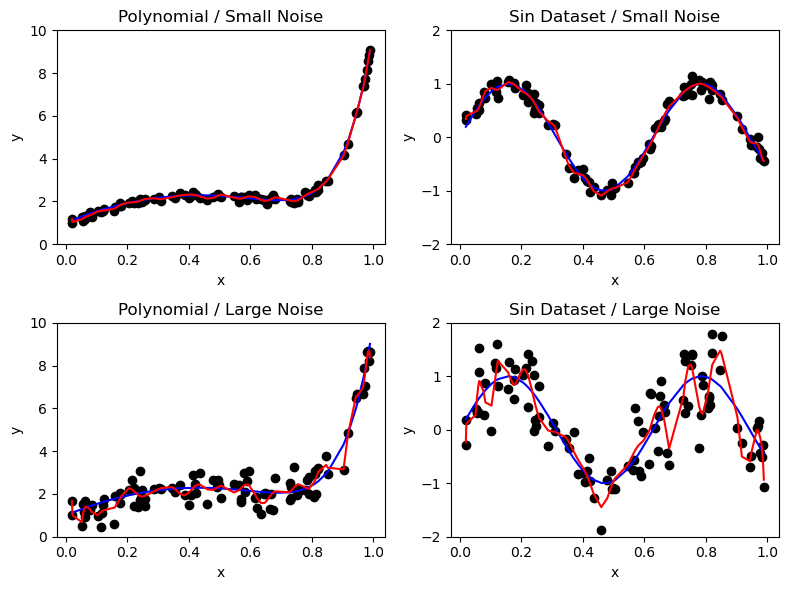

In [69]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(221)
ax1.scatter(x_data, y_poly_small_noise, c='k')
ax1.plot(x_data, my_polynomial(x_data), c='b')
ax1.plot(x_data, y_fit_poly_small_noise, c='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Polynomial / Small Noise')
ax1.set_ylim([0, 10])

ax2 = fig.add_subplot(222)
ax2.scatter(x_data, y_sin_small_noise, c='k')
ax2.plot(x_data, my_sin(x_data), c='b')
ax2.plot(x_data, y_fit_sin_small_noise, c='r')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Sin Dataset / Small Noise')
ax2.set_ylim([-2, 2])

ax3 = fig.add_subplot(223)
ax3.scatter(x_data, y_poly_large_noise, c='k')
ax3.plot(x_data, my_polynomial(x_data), c='b')
ax3.plot(x_data, y_fit_poly_large_noise, c='r')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Polynomial / Large Noise')
ax3.set_ylim([0, 10])

ax4 = fig.add_subplot(224)
ax4.scatter(x_data, y_sin_large_noise, c='k')
ax4.plot(x_data, my_sin(x_data), c='b')
ax4.plot(x_data, y_fit_sin_large_noise, c='r')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title('Sin Dataset / Large Noise')
ax4.set_ylim([-2, 2])


fig.tight_layout()